String Basics

In [21]:
seq = "ACTG"

In [22]:
seq[1]

'C'

In [23]:
len(seq)

4

In [24]:
### join strings of DNa sequences
seq1 = "GTAC" 
seq2 = "CATT"
print(seq1 + seq2)

GTACCATT


In [25]:
seqs = ["A", "C", "G", "T"]
print("," .join(seqs))

A,C,G,T


In [26]:
#### create randoms string of random sequences
import random
#random.seed(7) # for same behaviour of random
random.choice("ACTG")

'G'

In [27]:
##create a longer string of nt
seq = ""
for _ in range(10): #_ as do not care about index, instead of using i
    seq += random.choice("ACTG")
print(seq)

GTTGCGCCCA


In [28]:
## another way to do it
seq = "".join([random.choice("ACTG") for _ in range(10)])
print(seq)

ACCTGGTTTA


In [29]:
seq[1:3] #refer to previous, do not include index 0

'CC'

In [30]:
seq[:3]

'ACC'

In [31]:
seq[7:]

'TTA'

In [32]:
seq[-3]

'T'

In [33]:
seq[-3:] # last 3 characters

'TTA'

## Manipulating Strings

In [34]:
## longest prefix, function
def LongestCommonPrefix(s1,s2):
    i = 0 #index
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]: #as long as index is between the two strings and characters are equal, so when we REACH THE mismatch
        i += 1
    return s1[:i]

LongestCommonPrefix("ACCATGT", "ACTAGAC")

'AC'

In [35]:
## if two strings match exactly
def match(s1, s2):
    if not len(s1) == len(s2): #if they are not the same length return False
        return False
    
    for i in range(len(s1)): #if it is in range
        if not s1[i] == s2[i]: # if they are not the same, return False
            return False
        
    return True #if they are the same, return True

#use function
match("ATGCT", "ATGCT")

True

In [36]:
###same def as using built-in python
"ATCG" == "ATGG"

False

In [37]:
## reverse complement function
##def function
def ReverseComplement(s):
    complement = {"A":"T", "C":"G", "T":"A", "G":"C"} # array for dictionary

    t = "" #empty
    for base in s:
        t = complement[base] + t
    return t

ReverseComplement("ACTAGCATCG")

'CGATGCTAGT'

## Downloading and parsing a genome

In [38]:
#Following line downloads FASTA file containing the lambda phage reference genome
!python -m wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa


Saved under lambda_virus (1).fa


In [41]:
##define function to read fa genome file
def ReadGenome(filename):
    genome = ""
    with open(filename, "r") as f: #r for reading
        for line in f:
            if  not line[0] == ">":
                genome += line.rstrip() #remove whitespace
    return genome

genome= ReadGenome("lambda_virus.fa") #read file virus

genome[:100]#print the first 100

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [42]:
len(genome) #print length

48502

In [43]:
##frequency of bases
counts = {"A": 0, "T":0, "C": 0, "G":0} #create dictionary
for base in genome:
    counts[base] += 1
print(counts)

{'A': 12334, 'T': 11986, 'C': 11362, 'G': 12820}


In [44]:
#or use module from python
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

## Working with sequencing reads

In [45]:
#download reads
!python -m wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq #download


Saved under SRR835775_1.first1000.fastq


In [47]:
#read and parse
def readFastQ(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() #ignore line
            seq = fh.readline().rstrip()
            fh.readline() #ignore line
            qual = fh.readline().rstrip()
            if len(seq) == 0: #if have reached the end of the file
                break
            sequences.append(seq) #append all the reads
            qualities.append(qual) #append all the qualities
    return sequences, qualities

seqs, quals = readFastQ("SRR835775_1.first1000.fastq") #open file

In [50]:
print(seqs[:5])
print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

In [52]:
#convert PHRED33 to quality score
def phred33ToQ(qual):
    return ord(qual) - 33

phred33ToQ("J") #try function

41

In [53]:
def createHist(qualities):
    hist = [0] * 50
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist

h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


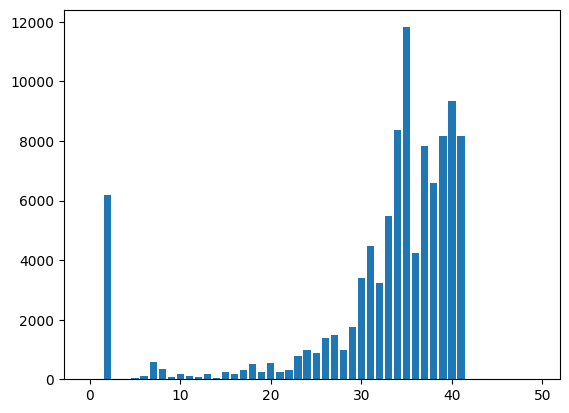

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar(range(len(h)), h)
plt.show()

## Analysing reads by position

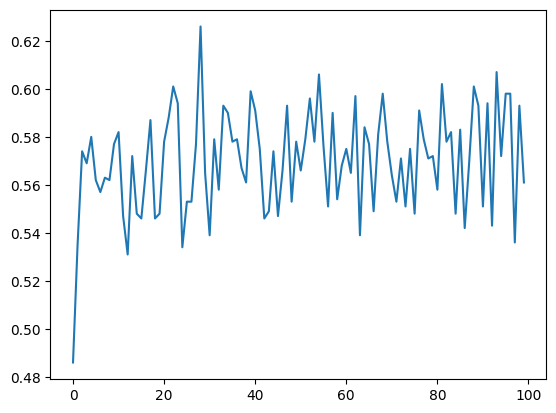

In [70]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc


gc = findGCByPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()


In [71]:
#import collections ## has been imported before

count = collections.Counter()
for seq in seqs:
    count.update(seq)
print(count)

# N no calls, as no good evidence to support, v low base call, no confidence

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


## Matching Artificial Reads

In [72]:
#!python -m wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa


Saved under phix.fa


In [74]:
genome = ReadGenome("phix.fa")

In [77]:
##Naive Exact Matches
def Naive(p, t): #p reads sequence, t genome
    occurrences = [] #create empty list for when p matches t
    for i in range(len(t) - len(p) +1): #every position in t without running past t
        match = True
        for j in range(len(p)): #compare characters
            if not t[i+j] == p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

t = "AGCTAGCTAGC"
p = "AG"

Naive(p,t) # these are the positions

[0, 4, 8]

In [78]:
##generate random reads function
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start: start+readLen])
    return reads


In [83]:
reads = generateReads(genome, 100, 100)

##counts matches function
numMatched = 0
for r in reads:
    matches = Naive(r, genome)
    if len(matches) >0:
        numMatched += 1
print("%d / %d reads matched exactly!" %(numMatched, len(reads)))

100 / 100 reads matched exactly!


In [84]:
!python -m wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq


Saved under ERR266411_1.first1000.fastq


In [86]:
phix_reads, _ = readFastQ("ERR266411_1.first1000.fastq")


In [89]:
## match reads to genome

numMatched = 0
n = 0
for r in phix_reads:
    matches = Naive(r, genome)
    n += 1
    if len(matches) >0:
        numMatched +=1

print("%d/%d reads matched the genome" %(numMatched, n))

## only 7/1000
## sequence errors, bases read incorrectly
## differences between indivudl and reference genome sequenced

7/1000 reads matched the genome


In [90]:
## match reads to genome

numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30] #taking the first 30 nt from the reads
    matches = Naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1

print("%d/%d reads matched the genome" % (numMatched, n))

##genome is double stranded, reads can come from diff strands

459/1000 reads matched the genome


In [96]:
## reverse complement function
##def function
def ReverseComplement(s):
    complement = {"A": "T", "C": "G", "T": "A", "G": "C", "N":"N"}  # array for dictionary
    ##add the N to the dictionary, as it can be found in the reads

    t = ""  # empty
    for base in s:
        t = complement[base] + t
    return t



## match reads to genome
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # taking the first 30 nt from the reads
    matches = Naive(r, genome)
    matches.extend(Naive(ReverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1

print("%d/%d reads matched the genome" % (numMatched, n))

## this is more than using just one strand

932/1000 reads matched the genome
